## Uses PyTrends
* Find Documenation here https://pypi.org/project/pytrends/
* First run pip install pytrends in terminal

In [32]:
# You need to run "pip install pytrends" in terminal in order to import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

colnames = ["keywords"]
df = pd.read_csv("search_terms.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-10 2020-08-05', # from and to dates here
     geo='US-IL') # 
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

df = pd.concat(dataset, axis=1)
df.to_csv('trends.csv')
executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))
print(df)

Execution time in sec.: 2.90828537940979
            Domestic Violence Help  Domestic Violence Hotline  \
date                                                            
2020-01-10                       0                          0   
2020-01-11                       0                          0   
2020-01-12                       0                          0   
2020-01-13                       0                          0   
2020-01-14                       0                          0   
...                            ...                        ...   
2020-08-01                       0                          0   
2020-08-02                       0                          0   
2020-08-03                       0                          0   
2020-08-04                       0                          0   
2020-08-05                       0                          0   

            Domestic Violence Shelter Chicago  Order of Protection  
date                                        

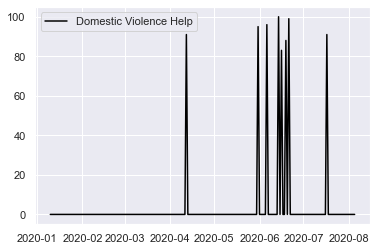

In [33]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all 5 trends in same chart
plt.figure()
plt.plot(df.index,df["Domestic Violence Help"],'black')
plt.legend(['Domestic Violence Help']);

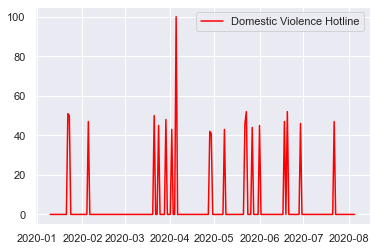

In [34]:
plt.figure()
plt.plot(df.index,df["Domestic Violence Hotline"],'red')
plt.legend(['Domestic Violence Hotline']);

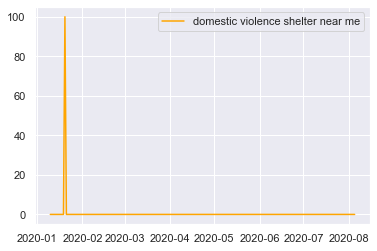

In [36]:
plt.figure()
plt.plot(df.index,df["Domestic Violence Shelter Chicago"],'orange')
plt.legend(['domestic violence shelter near me']);

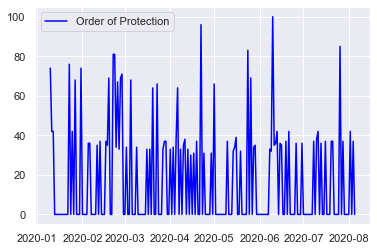

In [35]:
plt.figure()
plt.plot(df.index,df["Order of Protection"],'blue')
plt.legend(['Order of Protection']);

In [26]:
# plt.figure()
# plt.plot(df.index,df["domestic violence help near me"],'blue')
# plt.legend(['domestic violence help near me']);

In [28]:
df.reset_index(level=0,inplace=True) #reset_index
df.columns=['date','Domestic Violence Help','Domestic Violence Hotline','Order of Protection'] #change column names

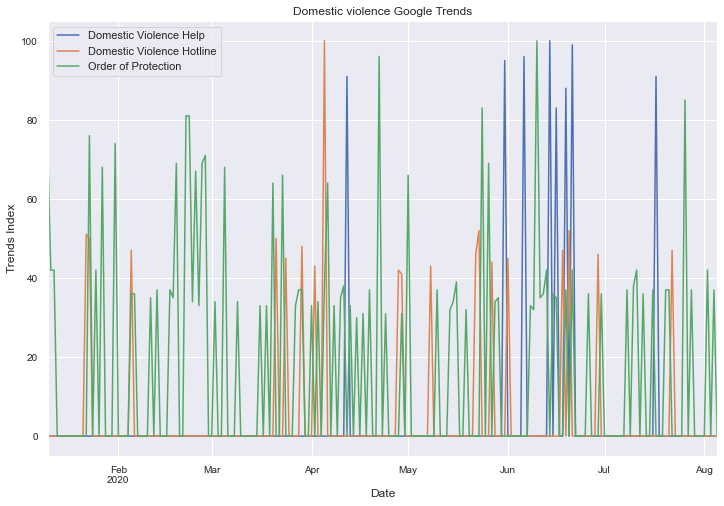

In [31]:
import seaborn as sns
sns.set(color_codes=True)
dx = df.plot(figsize = (12,8),x="date", y=['Domestic Violence Help','Domestic Violence Hotline','Order of Protection'], kind="line", title = "Domestic violence Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)